# DPD Citizens Complaint 

# Data Description

•	BPC or Board of Police Commissioners number – a unique identifier issued by the BPC to each case in numerical order after the case has been assigned to an Investigator, used for internal tracking purposes
•	CCR or Citizen Complaint Report number – the unique identifier automatically assigned to the case via the data management system 
•	Report Date – date the complaint was filed
•	Entry – mode of entry for the complaint by the citizen
•	Age – age of the citizen filing the complaint 
•	ctznRace – race of the citizen filing the complaint 
•	ctznSex – sex of the citizen filing the complaint 
•	Closed – date the investigation was completed by OCI 
•	Unit – commanding unit of the officer against which the complaint was filed
•	Administrative Closure – administrative finding 
•	Allegation – a claim as set forth by the citizen complaint
•	Finding – the disposition of a citizen complaint after investigation
•	ofcrRace – race of the officer against which the complaint was filed
•	ofcrSex – sex of the officer against which the complaint was filed

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("DPD__Citizen_Complaints.csv")

In [3]:
df.head()

,BPC,CCR,Report Date,Entry,Age,ctznRace,ctznSex,Closed,Unit,Administrative Closure,Allegation,Finding,ofcrRace,ofcrSex
0,16-1,67127,01/01/2016,Walk In,65.0,Black,Female,01/25/2016,UNKNOWN COMMAND,NaN,Procedure,Not Sustained,Unknown,Unknown
1,16-2,67128,01/04/2016,Walk In,75.0,Black,Male,01/21/2016,11TH PRECINCT,Admin. Closure,Procedure,Admin. Closure,Black,Male
2,16-2,67128,01/04/2016,Walk In,75.0,Black,Male,01/21/2016,11TH PRECINCT,Admin. Closure,Procedure,Admin. Closure,Black,Male
3,16-3,67129,01/04/2016,Telephone (or TDD),60.0,Black,Female,03/07/2016,5TH PRECINCT,NaN,Demeanor,No Charge,NaN,Male
4,16-3,67129,01/04/2016,Telephone (or TDD),60.0,Black,Female,03/07/2016,5TH PRECINCT,NaN,Demeanor,Not Sustained,Hispanic,Male


In [4]:
df.tail()

,BPC,CCR,Report Date,Entry,Age,ctznRace,ctznSex,Closed,Unit,Administrative Closure,Allegation,Finding,ofcrRace,ofcrSex
9373,18-153,69567,02/27/2018,Telephone (or TDD),38.0,NaN,Male,02/27/2018,8TH PRECINCT,Duplication,Procedure,Void,Black,Male
9374,18-153,69567,02/27/2018,Telephone (or TDD),38.0,NaN,Male,02/27/2018,8TH PRECINCT,Duplication,Service,Void,Black,Male
9375,18-154,69568,02/27/2018,Telephone (or TDD),38.0,NaN,Male,02/27/2018,8TH PRECINCT,Duplication,Demeanor,Void,Black,Male
9376,18-154,69568,02/27/2018,Telephone (or TDD),38.0,NaN,Male,02/27/2018,8TH PRECINCT,Duplication,Procedure,Void,Black,Male
9377,18-154,69568,02/27/2018,Telephone (or TDD),38.0,NaN,Male,02/27/2018,8TH PRECINCT,Duplication,Service,Void,Black,Male


In [5]:
df.describe()

,CCR,Age
count,9378.000000,9356.000000
mean,68352.569418,36.507268
std,697.710632,16.441759
min,67127.000000,-2.000000
25%,67740.000000,26.000000
50%,68342.000000,36.000000
75%,68970.000000,47.000000
max,69568.000000,117.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9378 entries, 0 to 9377
Data columns (total 14 columns):
BPC                       9378 non-null object
CCR                       9378 non-null int64
Report Date               9378 non-null object
Entry                     9378 non-null object
Age                       9356 non-null float64
ctznRace                  9363 non-null object
ctznSex                   9378 non-null object
Closed                    9375 non-null object
Unit                      9378 non-null object
Administrative Closure    2165 non-null object
Allegation                9378 non-null object
Finding                   9378 non-null object
ofcrRace                  9356 non-null object
ofcrSex                   9378 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [7]:
df.shape

(9378, 14)

In [9]:
df.columns

Index(['BPC', 'CCR', 'Report Date', 'Entry', 'Age', 'ctznRace', 'ctznSex',
       'Closed', 'Unit', 'Administrative Closure', 'Allegation', 'Finding',
       'ofcrRace', 'ofcrSex'],
      dtype='object')

In [8]:
df.ndim

2

In [6]:
vals = df['Allegation'].value_counts()

In [7]:
vals

Procedure     3249
Demeanor      2285
Service       1331
Force          636
Property       480
Harassment     453
Search         444
Arrest         318
Entry          177
procedure        4
arrest           1
Name: Allegation, dtype: int64

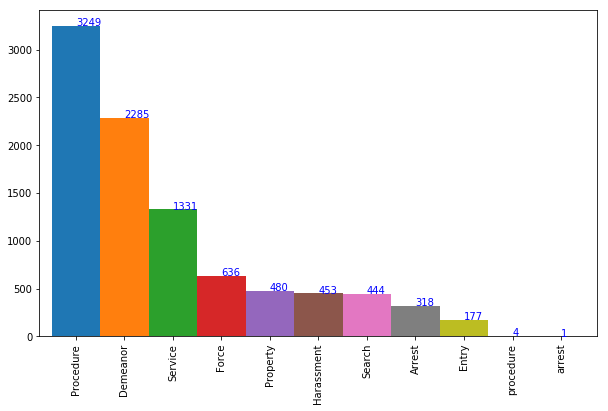

In [8]:
plt.figure(figsize=(10, 6),)
ax = vals.plot.bar(width = 1.0)
for i, v in vals.reset_index().iterrows():
    ax.text(i, v.Allegation + 0.2, v.Allegation, color = 'blue')

In [9]:
df['ctznRace'].unique()

array(['Black', 'Other', 'White', 'Unknown', 'Hispanic', 'Arabic',
       'Biracial', 'Asian', 'Pakistani', 'Chaldean', 'Native American',
       nan], dtype=object)

In [10]:
df['ctznSex'].unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

In [11]:
df['ofcrRace'].unique()

array(['Unknown', 'Black', nan, 'Hispanic', 'White', 'Other', 'Asian'],
      dtype=object)

In [12]:
df['ofcrSex'].unique()

array(['Unknown', 'Male', 'Female'], dtype=object)

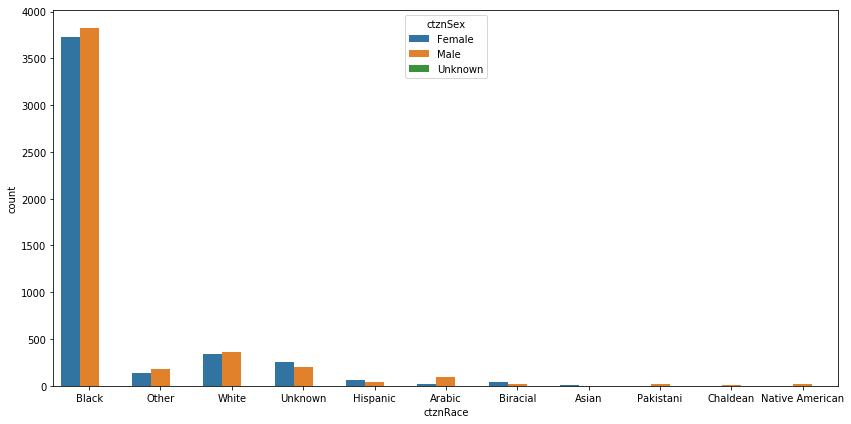

In [13]:
plt.figure(figsize=(12, 6),)
sns.countplot(x = 'ctznRace', hue = 'ctznSex', data = df)
plt.tight_layout()
plt.show()

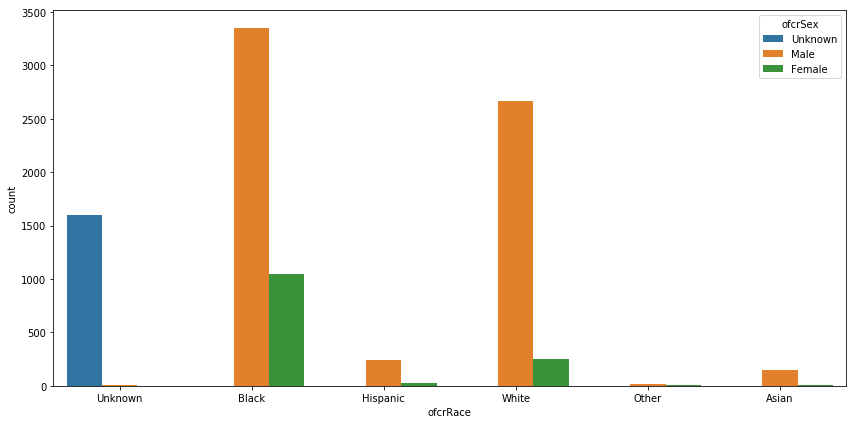

In [14]:
plt.figure(figsize=(12, 6),)
sns.countplot(x = 'ofcrRace', hue = 'ofcrSex', data = df)
plt.tight_layout()
plt.show()

In [15]:
entry_vals = df['Entry'].value_counts()

In [16]:
entry_vals

Telephone (or TDD)    4370
Walk In               3943
Online                 443
In-Custody             281
Letter                  97
Telephone               86
Outside agency          80
Email                   44
Unknown                 34
Name: Entry, dtype: int64

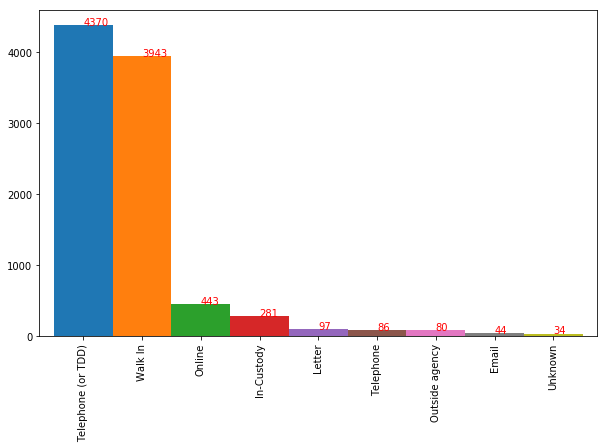

In [17]:
plt.figure(figsize=(10, 6),)
ax = entry_vals.plot.bar(width = 1.0)
for i, v in entry_vals.reset_index().iterrows():
    ax.text(i, v.Entry + 0.2, v.Entry, color = 'red')

In [18]:
Finding_vals = df['Finding'].value_counts()

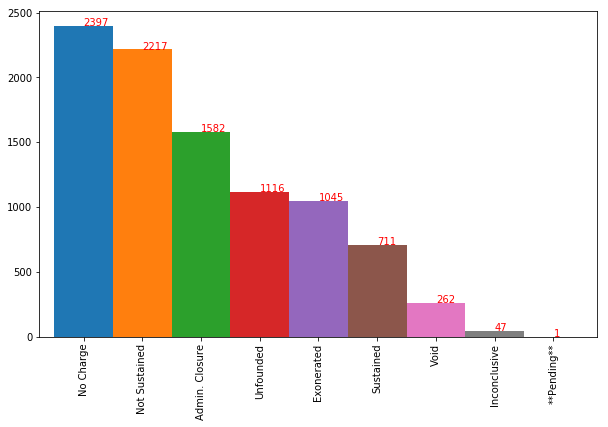

In [21]:
plt.figure(figsize=(10, 6),)
ax = Finding_vals.plot.bar(width = 1.0)
for i, v in Finding_vals.reset_index().iterrows():
    ax.text(i, v.Finding + 0.2, v.Finding, color = 'red')

In [21]:
# Time difference between Closing Date and Reporting Date for each case
df['Report Date'] = pd.to_datetime(df['Report Date'], dayfirst=True)
df['Closed'] = pd.to_datetime(df['Closed'], dayfirst=True)

In [22]:
num_days = df['Closed'] - df['Report Date']

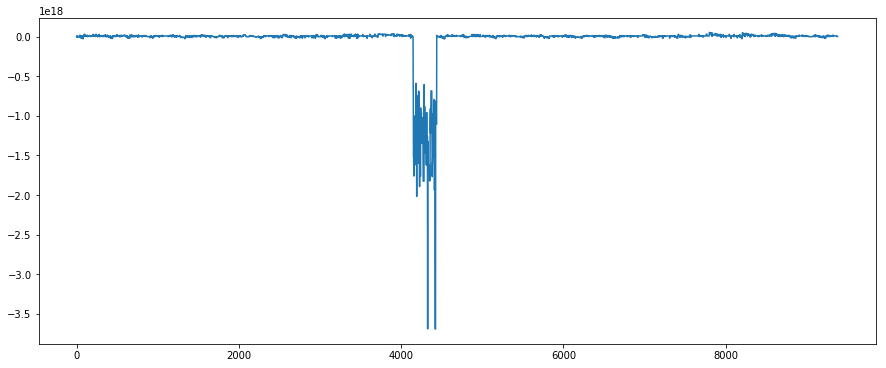

In [23]:
plt.figure(figsize=(15, 6),)
num_days.plot(kind = 'line')

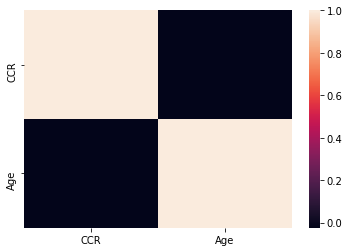

In [24]:
num_corr = df.corr()
sns.heatmap(num_corr)

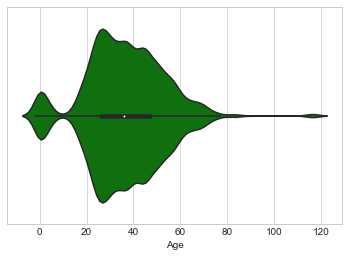

In [25]:
sns.set_style("whitegrid")
ax = sns.violinplot(x = df['Age'], color = 'green', )

# Summary

The name of the dataset is “DPD: Citizen Complaints” which has been fetched from the following URL: https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints/kahe-efs3

This particular dataset shows all citizen complaints that were received by the Detroit Police Department and the Board of Police Commissioners since January 1, 2016. This dataset has information about the nature of individual complaints, demographics for citizens filing the complaints and the officer against which the complaint was filed. This data gets updated every month.

The dataset contains 9,378 rows and 14 columns. Each row is a citizen complaint. The head and tail commands displayed the initial and last 5 rows of the data. The data had NaN values, which mean not a number. Using the describe function, the statistical data was shown. With this, it was understood that the CCR and Age had numerical data. The count of each allegation has been provided.

The first visualization shows that Procedure type allegation has been repeated for the highest number of times and Arrest type allegation has repeated for the least number of times. 

The second visualization shows the count and gender of citizen race. In this it was found that Black Male and Female had the highest count. Asian and Chaldean had the least count.

Similarly, the third visualization showed the count of officer’s race and gender, Black being the highest and Other being the least. 

The fourth visualization shows how the complaint was filed. In this, Telephone had the highest count and Unknown had the least count.

The fifth visualization showed the count of Findings. No Charge had the highest count and Pending had the least count.

The sixth visualization shows the duration between reporting date and closing date of the complaints. 

The seventh visualization shows the correlation between Age and CCR. From the visualization it was observed that there was a strong negative correlation.

The eighth visualization shows the violin plot for age. It was observed that the age was widespread between the range 20 and 60.
